<a href="https://colab.research.google.com/github/ffelfis/OrgaDatosTPs/blob/main/TP1/nb_facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de librerías y directorios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns

In [2]:
# Lectura de Dataset desde Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Ruta train_values.csv
dir_values = '/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_values.csv'

# Ruta train_labels.csv
dir_labels = '/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_labels.csv'

# Análisis de train_values.csv

In [4]:
df = pd.read_csv(dir_values)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 176.95 MiB


No hay columnas con datos nulos.

Se puede reallizar un cambio de tipo a las columnas para ajustar el uso de memoria.

### Columnas numéricas

`building_id`: \[4, 1052934\] $\rightarrow$ int32

`geo_level_1_id`: \[0, 30\] $\rightarrow$ int8

`geo_level_2_id`: \[0, 1427\] $\rightarrow$ int16

`geo_level_3_id`: \[0, 12567\] $\rightarrow$ int16

`count_floors_pre_eq`: \[0, 9\] $\rightarrow$ int8

`age`: \[0, 995\] $\rightarrow$ int16

`area_percentage`: \[0, 100\] $\rightarrow$ int8

`height_percentage`: \[2, 32\] $\rightarrow$ int8

`count_families`: \[0, 9\] $\rightarrow$ int8

In [7]:
df.loc[:, 'building_id':'height_percentage'].describe().astype('int64').loc[['max', 'min'], :]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
max,1052934,30,1427,12567,9,995,100,32
min,4,0,0,0,1,0,1,2


In [8]:
df['building_id'] = df['building_id'].astype('int32')
df['geo_level_1_id'] = df['geo_level_1_id'].astype('int8')
df['geo_level_2_id'] = df['geo_level_2_id'].astype('int16')
df['geo_level_3_id'] = df['geo_level_3_id'].astype('int16')
df['count_floors_pre_eq'] = df['count_floors_pre_eq'].astype('int8')
df['age'] = df['age'].astype('int16')
df['area_percentage'] = df['area_percentage'].astype('int8')
df['height_percentage'] = df['height_percentage'].astype('int8')
df['count_families'] = df['count_families'].astype('int8')

In [9]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 162.79 MiB


### Columnas booleanas

`has_superstructure_adobe_mud`, `has_superstructure_mud_mortar_stone`, `has_superstructure_stone_flag`, 
`has_superstructure_cement_mortar_stone`, `has_superstructure_mud_mortar_brick`, `has_superstructure_cement_mortar_brick`, `has_superstructure_timber`, `has_superstructure_bamboo`, `has_superstructure_rc_non_engineered`, `has_superstructure_rc_engineered`, `has_superstructure_other`, `has_secondary_use`, `has_secondary_use_agriculture`, `has_secondary_use_hotel`, `has_secondary_use_rental`, `has_secondary_use_institution`, `has_secondary_use_school`, `has_secondary_use_industry`, `has_secondary_use_health_post`, `has_secondary_use_gov_office`, `has_secondary_use_use_police`, `has_secondary_use_other`

Todas tienen valores \[0, 1\] $\Longrightarrow$ bool

In [10]:
df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')
df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

In [11]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 124.51 MiB


### Columnas Categóricas

`land_surface_condition`, `foundation_type`, `roof_type`, `ground_floor_type`, `other_floor_type`, `position`, `plan_configuration`, `legal_ownership_status`

In [12]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')

In [13]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 11.19 MiB


# **[NO NECESARIO]** (Mapa)

In [ ]:
# Paquete para manejo de mapas
!pip install geopandas
# Para leer shape files con el paque 'shapefile' (contienen geometría de mapas)
!pip install pyshp

In [ ]:
import geopandas as gpd
import shapefile as shp

## Mapa de Nepal

Se lee el archivo .shp con `shapefile`. Se requieren los archivos que acompañan al .shp.

In [ ]:
sf_Nepal = shp.Reader('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [ ]:
# Identificación de campos (~ futuro índice de columnas)
sf_Nepal.fields

In [ ]:
# Datos de los campos anteriores
sf_Nepal.records()

In [ ]:
# Puntos de coordenadas para los bordes de los estados.
sf_Nepal.shape(1).points

Se lee el archivo .shp con geopandas.

In [ ]:
map_df = gpd.read_file('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [ ]:
type(map_df)

In [ ]:
map_df.sample(2, random_state=42)

In [ ]:
map_df.plot(figsize=(5,5), color='green')

plt.show()

# Análisis train_labels.csv

In [14]:
df_labels = pd.read_csv(dir_labels)

In [15]:
df_labels.describe().loc[['min', 'max'], 'damage_grade'].to_frame()

,damage_grade
min,1.0
max,3.0


In [16]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 3.98 MiB


In [17]:
df_labels['damage_grade'] = df_labels['damage_grade'].astype('int8')

In [18]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 2.24 MiB


In [19]:
df = df.merge(df_labels, on='building_id', how='inner')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

Las filas mantienen el mismo número, 260601, por lo que los `building_id` tenían su correpondiente fila de labels.

# Análisis de grado de daños por cantidad de pisos

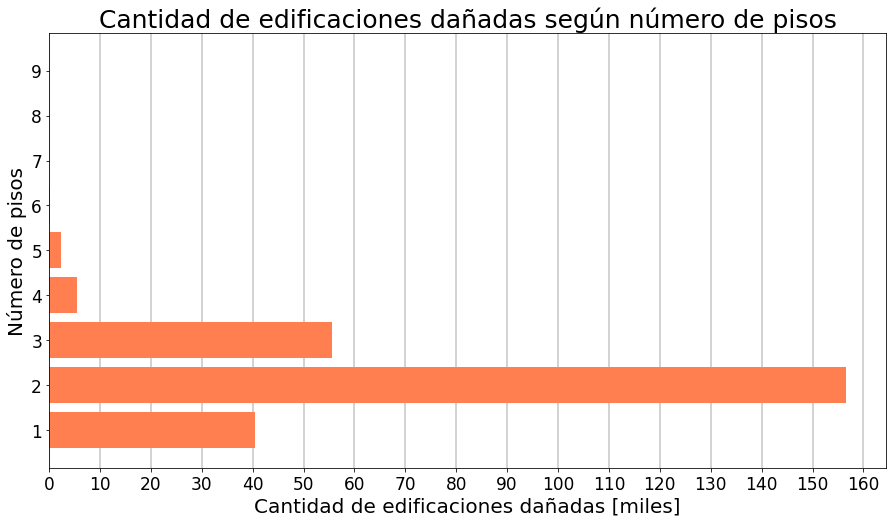

In [21]:
fig,ax = plt.subplots(figsize=(15,8))
pisos = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['count_floors_pre_eq']
cantidad = df\
  .groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index()\
  .rename(columns={'damage_grade':'quantity'})['quantity']

plot = ax.barh(y=pisos, width=cantidad, color='coral')

title='''Cantidad de edificaciones dañadas según número de pisos'''
plt.title(label=title, fontsize=25)
plt.xlabel('Cantidad de edificaciones dañadas [miles]', fontsize=20)
plt.ylabel('Número de pisos', fontsize=20)
plt.xticks(np.arange(0, 160001, step=10000), fontsize=17)
plt.yticks(np.arange(1, 10, step=1), fontsize=17)

# Función para elegir unidades de miles millón
def mil(x, pos):
  return '{:,.0f}'.format(x*1e-3)

plt.gca().xaxis.set_major_formatter(FuncFormatter(mil))
plt.grid(axis='x', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

#plt.show()

# Mapas de calor: Cantidad de edificaciones con daños (low, medium, high) para los distintos geo_level_x_id

In [22]:
# Se hace una copia al crear el nuevo DataFrame
columnas = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'damage_grade'] 
df_geo_levels_damage = df\
  .loc[:, columnas]\
  .set_index('damage_grade').copy()

In [23]:
# Creación de Dataframe para bins por geo_level_x_id

df_geo_levels_damage = pd.DataFrame()

bins = np.arange(0, 31, step=2)
df_geo_levels_damage['geo_level_1_id_binned'] = pd.cut(df['geo_level_1_id'], bins)

bins = np.arange(0, 1441, step=96)
df_geo_levels_damage['geo_level_2_id_binned'] = pd.cut(df['geo_level_2_id'], bins)

bins = np.arange(0, 12571, step=838)
df_geo_levels_damage['geo_level_3_id_binned'] = pd.cut(df['geo_level_3_id'], bins)

df_geo_levels_damage['damage_grade'] = df['damage_grade']

In [24]:
df_geo_levels_damage.head(3)

,geo_level_1_id_binned,geo_level_2_id_binned,geo_level_3_id_binned,damage_grade
0,"(4, 6]","(480, 576]","(11732, 12570]",3
1,"(6, 8]","(864, 960]","(2514, 3352]",2
2,"(20, 22]","(288, 384]","(8380, 9218]",3


Con este nuevo DataFrame se va a calcular las cantidades necesarias.

In [25]:
df_geo_levels_damage['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

Según el registro de daños, por cantidad, primero se tienen edificaciones con daños medios, luego con daños graves y finalmente con daños leves.

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_1_id`

In [26]:
# Cantidad de edificaciones dañadas para geo_level_id_1 contadas por nivel de daño
df_geo_damage_geo_1 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_geo_damage_geo_1 = df_geo_damage_geo_1.merge(df_aux, on='geo_level_1_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_1_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_1_id', 'geo_level_1_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_1_id', ascending=False)

df_geo_damage_geo_1 = df_geo_damage_geo_1.merge(df_aux, on='geo_level_1_id', how='outer')
df_geo_damage_geo_1.set_index('geo_level_1_id', inplace=True)

In [27]:
# Cantidad total de edificaciones de geo_level_1_id que registran algún daño 
df_geo_damage_geo_1.sum()

cant_low_dmg     24787
cant_med_dmg    145184
cant_hig_dmg     86619
dtype: int64

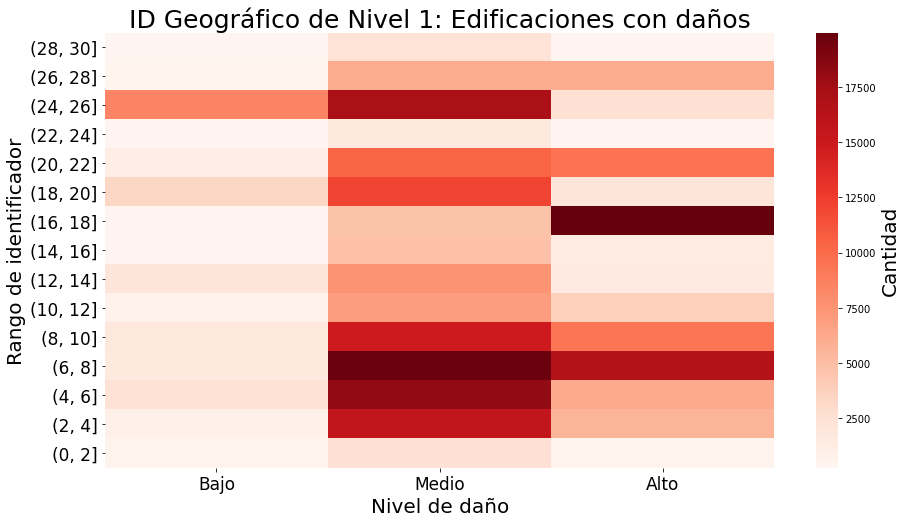

In [28]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_1, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 1: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

### Notables

In [29]:
df_geo_damage_geo_1['cant_low_dmg'].nlargest(1)

geo_level_1_id
(24, 26]    8496
Name: cant_low_dmg, dtype: int64

In [30]:
df_geo_damage_geo_1['cant_med_dmg'].nlargest(5)

geo_level_1_id
(6, 8]      19786
(4, 6]      18236
(24, 26]    17029
(2, 4]      15714
(8, 10]     14840
Name: cant_med_dmg, dtype: int64

In [31]:
df_geo_damage_geo_1['cant_hig_dmg'].nlargest(2)

geo_level_1_id
(16, 18]    19946
(6, 8]      16601
Name: cant_hig_dmg, dtype: int64

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_2_id`

In [32]:
# Cantidad de edificaciones dañadas para geolevel_id_2 contadas por nivel de daño
df_geo_damage_geo_2 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_geo_damage_geo_2 = df_geo_damage_geo_2.merge(df_aux, on='geo_level_2_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_2_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_2_id', 'geo_level_2_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_2_id', ascending=False)

df_geo_damage_geo_2 = df_geo_damage_geo_2.merge(df_aux, on='geo_level_2_id', how='outer')
df_geo_damage_geo_2.set_index('geo_level_2_id', inplace=True)

In [33]:
# Cantidad total de edificaciones de geo_level_2_id que registran algún daño 
df_geo_damage_geo_2.sum()

cant_low_dmg     25124
cant_med_dmg    148250
cant_hig_dmg     87189
dtype: int64

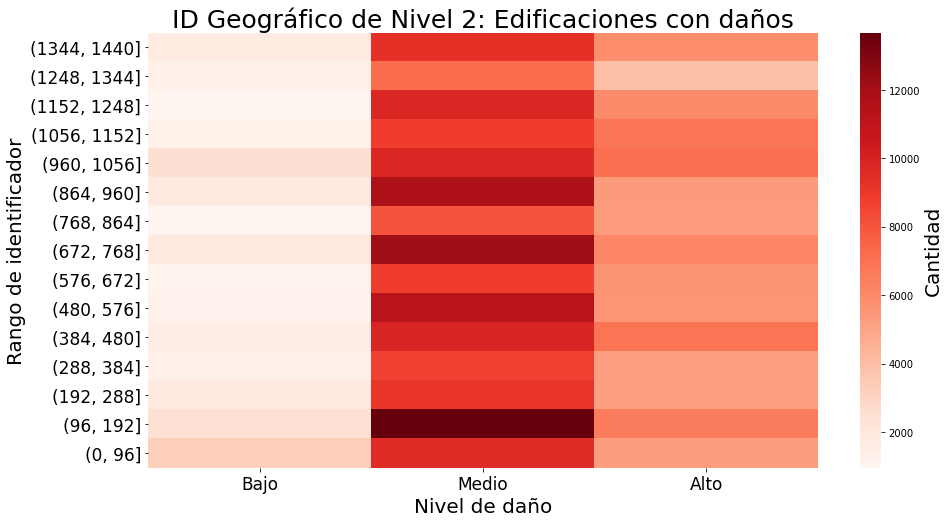

In [34]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_2, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 2: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

In [35]:
df_geo_damage_geo_2['cant_low_dmg'].nsmallest(3)

geo_level_2_id
(768, 864]       952
(1152, 1248]     965
(576, 672]      1123
Name: cant_low_dmg, dtype: int64

In [36]:
df_geo_damage_geo_2.sum(axis=1).sort_values()

geo_level_2_id
(1248, 1344]    12502
(768, 864]      14381
(288, 384]      15263
(576, 672]      15598
(192, 288]      16186
(1152, 1248]    16755
(1056, 1152]    16935
(1344, 1440]    16969
(480, 576]      18045
(0, 96]         18209
(384, 480]      18386
(864, 960]      18866
(960, 1056]     19485
(672, 768]      20236
(96, 192]       22747
dtype: int64

## Cantidad de edificaciones con daños (low, medium, high) para `geo_level_3_id`

In [37]:
# Cantidad de edificaciones dañadas para geolevel_id_3 contadas por nivel de daño
df_geo_damage_geo_3 = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 1, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_low_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 2, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_med_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_geo_damage_geo_3 = df_geo_damage_geo_3.merge(df_aux, on='geo_level_3_id', how='outer')

df_aux = df_geo_levels_damage\
  .loc[df_geo_levels_damage['damage_grade'] == 3, 'geo_level_3_id_binned']\
  .value_counts().to_frame()\
  .reset_index()\
  .rename(columns={'index':'geo_level_3_id', 'geo_level_3_id_binned':'cant_hig_dmg'})\
  .sort_values(by='geo_level_3_id', ascending=False)

df_geo_damage_geo_3 = df_geo_damage_geo_3.merge(df_aux, on='geo_level_3_id', how='outer')
df_geo_damage_geo_3.set_index('geo_level_3_id', inplace=True)

In [38]:
# Cantidad total de edificaciones de geo_level_3_id que registran algún daño 
df_geo_damage_geo_3.sum()

cant_low_dmg     25124
cant_med_dmg    148259
cant_hig_dmg     87216
dtype: int64

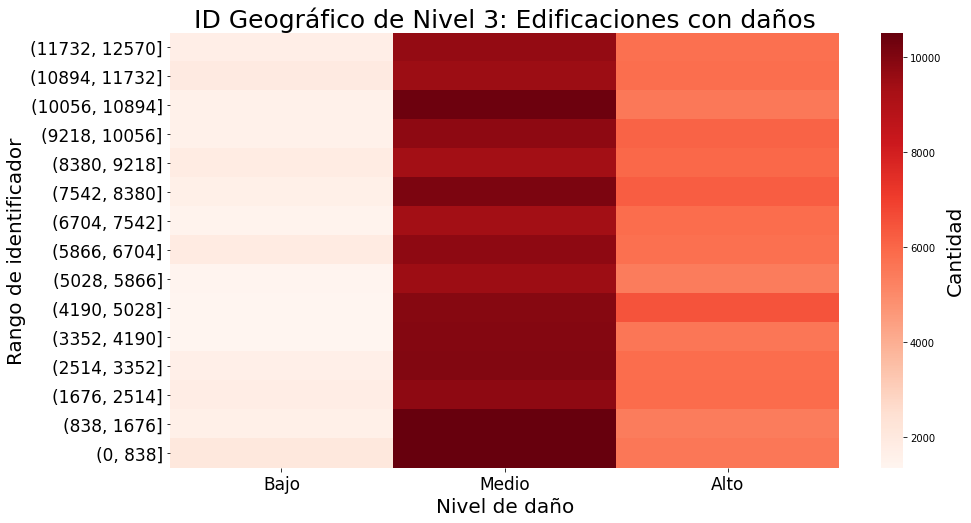

In [39]:
plt.figure(figsize=(15,8))
plot = sns.heatmap(df_geo_damage_geo_3, cmap='Reds', \
                   cbar_kws={'label': 'Cantidad'}, \
                   xticklabels=['Bajo', 'Medio', 'Alto'])

title='''ID Geográfico de Nivel 3: Edificaciones con daños'''
plt.title(label=title, fontsize=25)
plt.xlabel('Nivel de daño', fontsize=20)
plt.ylabel('Rango de identificador', fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
# Tamaño de fuente del rótulo de la barra de colores
plot.figure.axes[-1].yaxis.label.set_size(20)
plt.show()

In [40]:
df_geo_damage_geo_3['cant_med_dmg'].nlargest(5)

geo_level_3_id
(0, 838]          10518
(838, 1676]       10499
(10056, 10894]    10392
(7542, 8380]      10118
(2514, 3352]       9983
Name: cant_med_dmg, dtype: int64

Ya que la distribución de casos parece tener cierta uniformidad tiene sentido analizar algunos estadísticos.

In [41]:
i=1
for col in df_geo_damage_geo_3.columns:
  print('Nivel Geográfico', i, ':')
  print('\tcant\t', df_geo_damage_geo_3[col].sum())
  print('\tmedia\t', np.round(df_geo_damage_geo_3[col].mean(), 0))
  print('\tmediana\t', df_geo_damage_geo_3[col].median())
  print('\tdesvío\t', np.round(df_geo_damage_geo_3[col].std(), 0))
  i = i+1

Nivel Geográfico 1 :
	cant	 25124
	media	 1675.0
	mediana	 1665.0
	desvío	 220.0
Nivel Geográfico 2 :
	cant	 148259
	media	 9884.0
	mediana	 9799.0
	desvío	 371.0
Nivel Geográfico 3 :
	cant	 87216
	media	 5814.0
	mediana	 5802.0
	desvío	 301.0


### Conclusión

En las tres regiones geográficas se ve que la ocurrencia de poco daño es mínima comparada con los otros tipos de daño. Las edificaciones con daño medio dominan en todas las regiones, especialmente en la región geográfica de nivel 3.

# Daños por condición de superficie

In [131]:
df_dmg_by_surf_cond = df\
  .loc[df['damage_grade'] == 1, 'land_surface_condition']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'surf_cond', \
                   'land_surface_condition':'cant_low_dmg'})

df_dmg_by_surf_cond

,surf_cond,cant_low_dmg
0,t,21966
1,n,2556
2,o,602


In [132]:
df_dmg_by_surf_cond = df_dmg_by_surf_cond\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'land_surface_condition']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'surf_cond', \
                          'land_surface_condition':'cant_med_dmg'}), \
         on = 'surf_cond', how='left')
  
df_dmg_by_surf_cond

,surf_cond,cant_low_dmg,cant_med_dmg
0,t,21966,122067
1,n,2556,21484
2,o,602,4708


In [133]:
df_dmg_by_surf_cond = df_dmg_by_surf_cond\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'land_surface_condition']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'surf_cond', \
                          'land_surface_condition':'cant_hig_dmg'}), \
         on = 'surf_cond', how='left')
  
df_dmg_by_surf_cond

,surf_cond,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,t,21966,122067,72724
1,n,2556,21484,11488
2,o,602,4708,3006


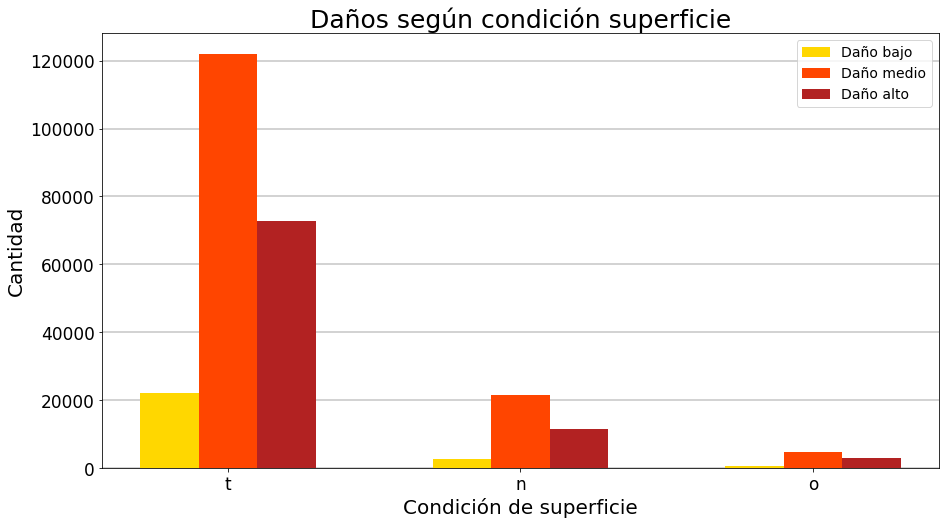

In [134]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_surf_cond['surf_cond']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_surf_cond['cant_low_dmg'], width,\
              label='Daño bajo', color='gold')
bar2 = ax.bar(x , df_dmg_by_surf_cond['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_surf_cond['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según condición de superficie', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Condición de superficie', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Daños por tipo de cimientos

In [135]:
df_dmg_by_foun_type = df\
  .loc[df['damage_grade'] == 1, 'foundation_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'foun_type', \
                   'foundation_type':'cant_low_dmg'})

df_dmg_by_foun_type

,foun_type,cant_low_dmg
0,r,10720
1,i,6004
2,w,4353
3,u,3689
4,h,358


In [136]:
df_dmg_by_foun_type = df_dmg_by_foun_type\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'foundation_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'foun_type', \
                          'foundation_type':'cant_med_dmg'}), \
         on = 'foun_type', how='left')
  
df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg
0,r,10720,125515
1,i,6004,4354
2,w,4353,9270
3,u,3689,8541
4,h,358,579


In [137]:
df_dmg_by_foun_type = df_dmg_by_foun_type\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'foundation_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'foun_type', \
                          'foundation_type':'cant_hig_dmg'}), \
         on = 'foun_type', how='left')
  
df_dmg_by_foun_type

,foun_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,r,10720,125515,82961
1,i,6004,4354,221
2,w,4353,9270,1495
3,u,3689,8541,2030
4,h,358,579,511


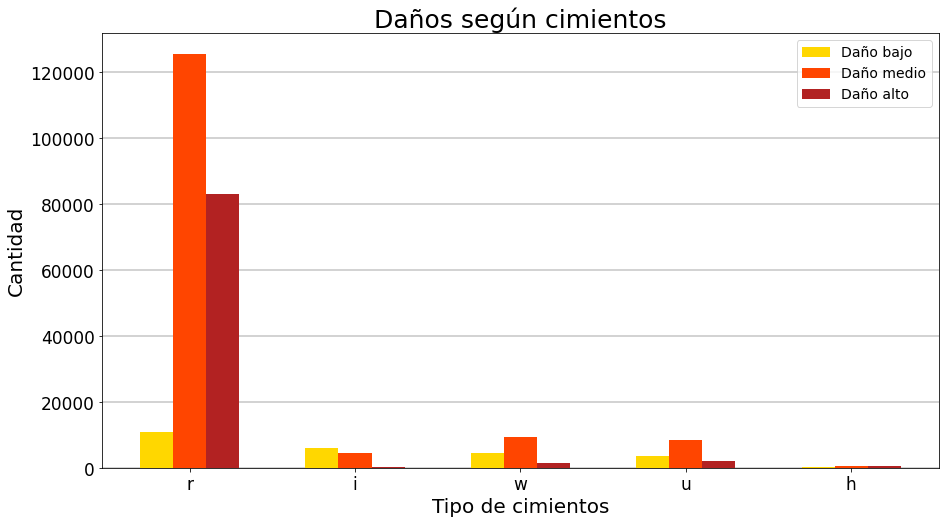

In [140]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_foun_type['foun_type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_foun_type['cant_low_dmg'], width,\
              label='Daño bajo', color='gold')
bar2 = ax.bar(x , df_dmg_by_foun_type['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_foun_type['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según cimientos', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de cimientos', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Daños según tipo de techo

In [145]:
df_dmg_by_roof_type = df\
  .loc[df['damage_grade'] == 1, 'roof_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'roof_type', \
                   'roof_type':'cant_low_dmg'})

df_dmg_by_roof_type

,roof_type,cant_low_dmg
0,n,13547
1,x,7651
2,q,3926


In [146]:
df_dmg_by_roof_type = df_dmg_by_roof_type\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'roof_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'roof_type', \
                          'roof_type':'cant_med_dmg'}), \
         on = 'roof_type', how='left')
  
df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg
0,n,13547,106447
1,x,7651,7803
2,q,3926,34009


In [147]:
df_dmg_by_roof_type = df_dmg_by_roof_type\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'roof_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'roof_type', \
                          'roof_type':'cant_hig_dmg'}), \
         on = 'roof_type', how='left')
  
df_dmg_by_roof_type

,roof_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,n,13547,106447,62848
1,x,7651,7803,729
2,q,3926,34009,23641


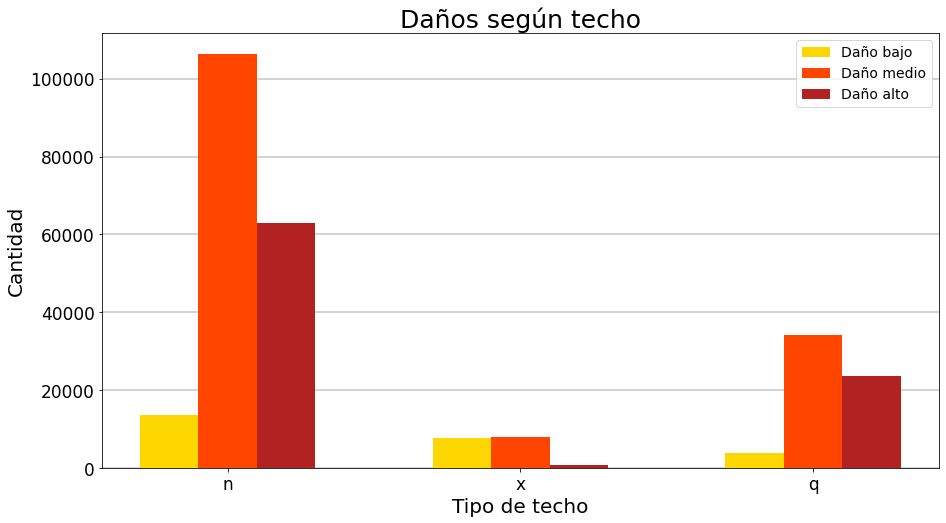

In [148]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_roof_type['roof_type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_roof_type['cant_low_dmg'], width,\
              label='Daño bajo', color='gold')
bar2 = ax.bar(x , df_dmg_by_roof_type['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_roof_type['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según techo', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de techo', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Daños según piso en la planta baja

In [153]:
df_dmg_by_grnd_floo = df\
  .loc[df['damage_grade'] == 1, 'ground_floor_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'ground_floor_type', \
                   'ground_floor_type':'cant_low_dmg'})

df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg
0,f,12474
1,v,10309
2,x,2052
3,z,199
4,m,90


In [154]:
df_dmg_by_grnd_floo = df_dmg_by_grnd_floo\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'ground_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'ground_floor_type', \
                          'ground_floor_type':'cant_med_dmg'}), \
         on = 'ground_floor_type', how='left')
  
df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg
0,f,12474,119877
1,v,10309,12971
2,x,2052,14536
3,z,199,532
4,m,90,343


In [155]:
df_dmg_by_grnd_floo = df_dmg_by_grnd_floo\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'ground_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'ground_floor_type', \
                          'ground_floor_type':'cant_hig_dmg'}), \
         on = 'ground_floor_type', how='left')
  
df_dmg_by_grnd_floo

,ground_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,f,12474,119877,77268
1,v,10309,12971,1313
2,x,2052,14536,8289
3,z,199,532,273
4,m,90,343,75


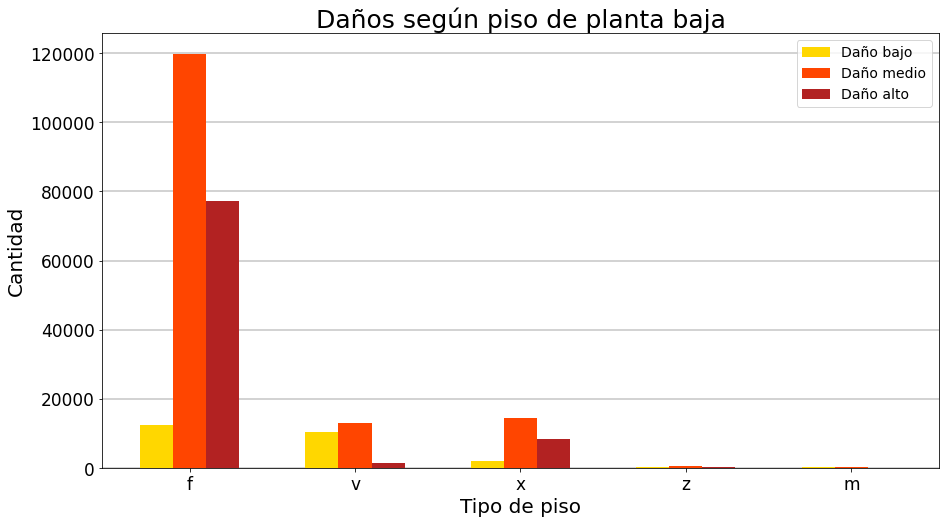

In [157]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_grnd_floo['ground_floor_type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_grnd_floo['cant_low_dmg'], width,\
              label='Daño bajo', color='gold')
bar2 = ax.bar(x , df_dmg_by_grnd_floo['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_grnd_floo['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según piso de planta baja', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)

# Daños según construcción de pisos superiores

In [158]:
df_dmg_by_othe_floo = df\
  .loc[df['damage_grade'] == 1, 'other_floor_type']\
  .value_counts().to_frame().reset_index()\
  .rename(columns={'index':'other_floor_type', \
                   'other_floor_type':'cant_low_dmg'})

df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg
0,j,8886
1,q,7387
2,s,5423
3,x,3428


In [159]:
df_dmg_by_othe_floo = df_dmg_by_othe_floo\
  .merge(df\
         .loc[df['damage_grade'] == 2, 'other_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'other_floor_type', \
                          'other_floor_type':'cant_med_dmg'}), \
         on = 'other_floor_type', how='left')
  
df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg
0,j,8886,20362
1,q,7387,98320
2,s,5423,5904
3,x,3428,23673


In [160]:
df_dmg_by_othe_floo = df_dmg_by_othe_floo\
  .merge(df\
         .loc[df['damage_grade'] == 3, 'other_floor_type']\
         .value_counts().to_frame().reset_index()\
         .rename(columns={'index':'other_floor_type', \
                          'other_floor_type':'cant_hig_dmg'}), \
         on = 'other_floor_type', how='left')
  
df_dmg_by_othe_floo

,other_floor_type,cant_low_dmg,cant_med_dmg,cant_hig_dmg
0,j,8886,20362,10595
1,q,7387,98320,59575
2,s,5423,5904,701
3,x,3428,23673,16347


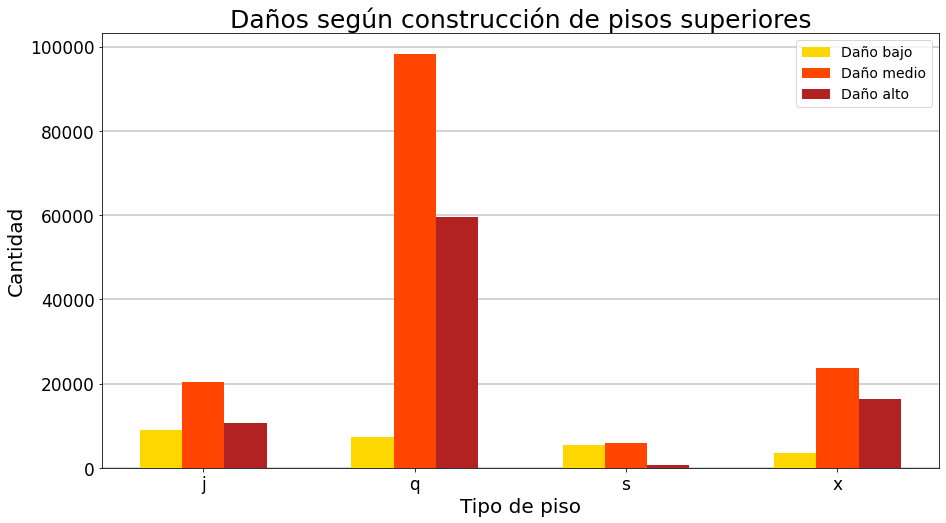

In [161]:
fig,ax = plt.subplots(figsize=(15,8))
labels = df_dmg_by_othe_floo['other_floor_type']
x = np.arange(len(labels))
width = 0.2

bar1 = ax.bar(x - width, df_dmg_by_othe_floo['cant_low_dmg'], width,\
              label='Daño bajo', color='gold')
bar2 = ax.bar(x , df_dmg_by_othe_floo['cant_med_dmg'], width,\
              label='Daño medio', color='orangered')
bar3 = ax.bar(x + width, df_dmg_by_othe_floo['cant_hig_dmg'], width,\
              label='Daño alto', color='firebrick')

ax.set_title('Daños según construcción de pisos superiores', fontsize=25)
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Tipo de piso', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=14)

plt.grid(axis='y', linewidth=2, color='lightgray')
ax.set_axisbelow(True)